<a href="https://colab.research.google.com/github/TR160qg/Learning_Cirq/blob/main/Cirq_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq==0.6 --quiet

     |████████████████████████████████| 1.2 MB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 42.1 MB/s 
     |████████████████████████████████| 1.7 MB 18.6 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 93 kB 1.4 MB/s 
     |████████████████████████████████| 93 kB 1.2 MB/s 
     |████████████████████████████████| 92 kB 1.1 MB/s 
     |████████████████████████████████| 93 kB 1.3 MB/s 
     |████████████████████████████████| 93 kB 1.1 MB/s 
     |████████████████████████████████| 92 kB 1.1 MB/s 
     |████████████████████████████████| 92 kB 987 kB/s 
     |████████████████████████████████| 92 kB 189 kB/s 
     |████████████████████████████████| 92 kB 157 kB/s 
     |████████████████████████████████| 92 kB 9.3 MB/s 
     |████████████████████████████████| 91 kB 10.7 MB/s 
     |████████████████████████████████| 91 kB 10.5 MB/s 
     |████████████████████████████████| 9

In [2]:
import cirq 
import numpy as np
import sympy
import matplotlib.pyplot as plt

print(cirq.google.Bristlecone)

                                             (0, 5)────(0, 6)
                                             │         │
                                             │         │
                                    (1, 4)───(1, 5)────(1, 6)────(1, 7)
                                    │        │         │         │
                                    │        │         │         │
                           (2, 3)───(2, 4)───(2, 5)────(2, 6)────(2, 7)───(2, 8)
                           │        │        │         │         │        │
                           │        │        │         │         │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)────(3, 6)────(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │         │         │        │        │
                  │        │        │        │         │         │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)────(4, 6)────(4, 7)───(4, 8)───(4, 9)───(4, 10)
         │        │      

# Creat a circuit

In [ ]:
# here are three qubits
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
c = cirq.NamedQubit('c')

#This is a collection of operations
#Each operation is a gate
ops = [cirq.H(a), cirq.H(b), cirq.CNOT(b,c), cirq.H(b)]

#The circuit is constructed from the collection of operations
circuit = cirq.Circuit(ops)

#let's have a look...
print(circuit)

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


Note for a controlled operation, the notation'@--' is used.

There are many different types of qubits in Cirq that are defined in the cirq.Oid class, e.g. 'cirq.LineQubit'--qubits at a location in a 1D-chain, 'cirq.GridQubit'--qubits at a location in a 2D-grid.

In [ ]:
# Use cirq.unitary to see the matrix correspond to Hadamard gate
cirq.unitary(cirq.H)

array([[ 0.70710678+0.j,  0.70710678+0.j],
       [ 0.70710678+0.j, -0.70710678+0.j]])

**Gate** objects have the ability to be applied 'On' to one or more qubits. There are two ways to do this for gates, either e.g. cirq.H.on(a) or cirq.H(a). 

**Circuit:** from a collection of operations, you can construct a *Circuit* using the class method Circuit(operations):

circuit = cirq.Circuit(ops)

**Diagram** Circuits can be printed as text diagrams, it is very helpful but does not get into the interanl details of how the Circuit is represented.

A circuit is made up of a sequence of Moment objects. And each Moment object is a list of non-overlapping Operations. 
To see the internal structire of a circuit, one can iterate over the Moments in the circuit while printing them out.

In [ ]:
for i, moment in enumerate(circuit):
  print('Moment {}: {}'.format(i, moment))

Moment 0: H(a) and H(b)
Moment 1: CNOT(b, c)
Moment 2: H(b)


One can also print the circuits by [repr](https://docs.python.org/3/library/functions.html#repr), which returns a more detailed expression.

In [ ]:
print(repr(circuit))

cirq.Circuit([
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('a')),
        cirq.H.on(cirq.NamedQubit('b')),
    ]),
    cirq.Moment(operations=[
        cirq.CNOT.on(cirq.NamedQubit('b'), cirq.NamedQubit('c')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('b')),
    ]),
])


# Building Circuits
1. circuit(*ops)
2. append
3. insert: InsertStrategy

In [ ]:
print(circuit)

a: ───H───────────

b: ───H───@───H───
          │
c: ───────X───────


In [ ]:
# Create an empty circuit on three qubits 'a', 'b' and 'c'
circuit = cirq.Circuit()

# Insert a CZ at the first(zero) moment
circuit.append([cirq.CZ(a, b)])
# The next free moment on qubits a and b is one (1)
# On qubit c the next free moment is zero
circuit.append([cirq.H(b), cirq.H(b), cirq.H(a), cirq.H(c)])
# We can add a T gate inline to the last Hadamard on moment two
circuit.append(cirq.T.on(c), strategy=cirq.InsertStrategy.INLINE)

print(circuit, '\n')
print(repr(circuit))

a: ───@───H───────
      │
b: ───@───H───H───

c: ───H───────T─── 

cirq.Circuit([
    cirq.Moment(operations=[
        cirq.CZ.on(cirq.NamedQubit('a'), cirq.NamedQubit('b')),
        cirq.H.on(cirq.NamedQubit('c')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('b')),
        cirq.H.on(cirq.NamedQubit('a')),
    ]),
    cirq.Moment(operations=[
        cirq.H.on(cirq.NamedQubit('b')),
        cirq.T.on(cirq.NamedQubit('c')),
    ]),
])


# Gates

Many common gates are implemented in Cirq, including:

In [ ]:
q0, q1, q2 = cirq.LineQubit.range(3)
ops = [
       cirq.X(q0),
       cirq.Y(q1),
       cirq.Z(q2),
       cirq.CZ(q0, q1),
       cirq.CNOT(q1, q2),
       cirq.H(q0),
       cirq.T(q1),
       cirq.S(q2),
       cirq.CCZ(q0, q1, q2),
       cirq.SWAP(q0, q1),
       cirq.CSWAP(q0, q1, q2),
       cirq.CCX(q0, q1, q2),
       cirq.ISWAP(q0, q1),
       cirq.Rx(0.5 * np.pi)(q0),
       cirq.Ry(0.5 * np.pi)(q1),
       cirq.Rz(0.5 * np.pi)(q2),
       #Square root of X
       (cirq.X**0.5)(q0),
]

print(cirq.Circuit(ops))

0: ───X───@───H───────@───×───@───@───iSwap──────Rx(0.5π)───X^0.5───
          │           │   │   │   │   │
1: ───Y───@───@───T───@───×───×───@───iSwap──────Ry(0.5π)───────────
              │       │       │   │
2: ───Z───────X───S───@───────×───X───Rz(0.5π)──────────────────────


! Matrix representations in the computational basis can be obtained by calling **cirq.unitary** on the gate. For example:

In [ ]:
print(cirq.unitary(cirq.CNOT))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [ ]:
print(cirq.unitary(cirq.Rx(0.5*np.pi)))

[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]


For the variational algrithms we will need the single qubit rotation gates:
1. cirq.Rx($\theta$)
2. cirq.Ry($\theta$)
3. cirq.Rz($\theta$)

# Simulation of a circuit

The simulate_moment_steps method allows to simulate the circuit Moment by Moment.

At each point, the state can be accessed.

Example: create a circuit that is a series of small cirq.Rx rotations and plot te probability of measuring the state in the |0> state. Note the default initial state is |0>.

Circuit is a bunch of small rotations about Pauli X axis:
a: ───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───

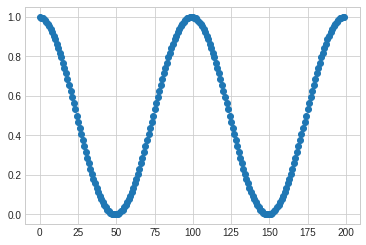

In [ ]:
# A single qubit circuit
a = cirq.NamedQubit('a')

# there are 200 Moments in this circuit. Each is a simulation step.
steps = 200
small_rotations = [cirq.Rx(np.pi / 50.0)(a) for theta in range(steps)]
circuit = cirq.Circuit(small_rotations)

print('Circuit is a bunch of small rotations about Pauli X axis:')
print('{}\n'.format(circuit))

# store indices of steps on the X axis
z = []
# store probabilities on the Y axis
p0 = []

print('We step through the circuit and plot the probability for the |0> states as a function of index of the moment being stepped over.')

simulator = cirq.Simulator()
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
  # probability is square of amplitude
  prob = np.abs(step.state_vector())**2
  # save the index
  z.append(i)
  # save the probability
  p0.append(prob[0])

# plot a graph
plt.style.use('seaborn-whitegrid')
plt.plot(z, p0, 'o')


Above we have given ourself the direct access to the wave function and calculated the exact probabilities. Suppose we want to sample from the wave function at each point instead.

Circuit is a bunch of small rotations about Pauli X axis:
a: ───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───

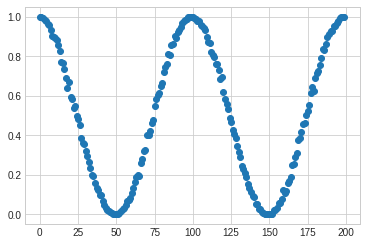

In [ ]:
# A single qubit circuit
a = cirq.NamedQubit('a')

# there are 200 Moments in this circuit. Each is a simulation step.
steps = 200
small_rotations = [cirq.Rx(np.pi / 50.0)(a) for theta in range(steps)]
circuit = cirq.Circuit(small_rotations)

print('Circuit is a bunch of small rotations about Pauli X axis:')
print('{}\n'.format(circuit))

# store indices of steps on the X axis
z = []
# store probabilities on the Y axis
p0 = []

# sampling repetitions
repetitions = 1000

simulator = cirq.Simulator()
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
  samples = step.sample([a], repetitions=repetitions)
  # 0 is False, 1 is True
  prob = np.sum(samples, axis=0)
  # 1 - (the sum of 1 divided by repetitions)
  prob0 = 1 - (prob[0] / repetitions) 

  # save the index
  z.append(i)
  # save the probability
  p0.append(prob0)

# plot a graph
plt.style.use('seaborn-whitegrid')
plt.plot(z, p0, 'o')

# Gate decompositions
Often the set of gates that one can apply is limited, either by the phyiscal hardware or perhaps by the quantum error correcting code one works with.

Cirq support gate decomposition via the **decompose** protocol

In [ ]:
class HXGate(cirq.SingleQubitGate):
  def _decompose_(self, qubits):
    return cirq.H(*qubits), cirq.X(*qubits)

  def _str_(self):
    return '*HX*'

HX = HXGate()

a = cirq.NamedQubit('a')
circuit = cirq.Circuit([HX(a)])
print('before decomposition: ')
print(circuit)
print(cirq.unitary(circuit))

print()

print('after decomposition: ')
print(cirq.Circuit(cirq.decompose(circuit)))
print(cirq.unitary(cirq.Y**0.5))

before decomposition: 
a: ───<__main__.HXGate object at 0x7efe3cbad210>───
[[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]

after decomposition: 
a: ───Y^0.5───X───X───
[[ 0.5+0.5j -0.5-0.5j]
 [ 0.5+0.5j  0.5+0.5j]]


The decomposition indicates that the HX gate is equivalent to the Y^0.5 gate, although the matrices differ.
Equivalent gates need to map any input state to output states that can only differ by a global phase, since

<x|$e^{i \phi}$O$e^{-i \phi}$|x> = <x|o|x> for any |x> and any observable O.
This can be tested via

In [ ]:
print(cirq.testing.assert_allclose_up_to_global_phase(cirq.unitary(cirq.Y**0.5), cirq.unitary(circuit), atol=1e-10))

None


Note that upper code not only decomposed the HX gate into H and X but also decomposed H into Y**0.5 and X. In order to decompose only once, one can use cirq.decompose_once:

In [ ]:
print(cirq.Circuit(cirq.decompose_once(HX(a))))

a: ───H───X───


To change this decomposition at run time for the specific hardware or context, define an interceptor function which does aspecific decomposition before falling back to the default.

In [ ]:
def my_decompose(op):
  if isinstance(op, cirq.GateOperation) and isinstance(op.gate, HXGate):
    return cirq.Z(*op.qubits), cirq.H(*op.qubits)

cirq.Circuit(cirq.decompose(HX(a), intercepting_decomposer=my_decompose))

a: ───Z───Y^0.5───X───

Can also define a predicate the says which gates to keep without further decomposition (default predicate is to only keep gates that cannot be decomposed).

In [ ]:
def keep_h_and_x(op):
  return isinstance(op, cirq.GateOperation) and op.gate in [cirq.H, cirq.X]

print(cirq.decompose(HX(a), keep=keep_h_and_x))

[cirq.H.on(cirq.NamedQubit('a')), cirq.X.on(cirq.NamedQubit('a'))]


# Simulation of a circuit

Now try to use Cirq to simulate the circuit

In [ ]:
# This circuit is written like a generator
# Gate are not added to a collection, but returned iteratively using keyword 'yeild'
# compare to the meathod before using 'yeild' allow us to generate operation in-time
# which can save a lot of RAM

def basic_circuit(measure=True):
  # The square root of the Pauli X gate
  sqrt_x = cirq.X**0.5
  # The CZ gate
  cz = cirq.CZ

  yield sqrt_x(a), sqrt_x(b)
  yield cz(a, b)
  yield sqrt_x(a), sqrt_x(b)

  if measure:
    yield cirq.measure(a, b)
    #yield cirq.measure(b, a)

circuit = cirq.Circuit(basic_circuit())
print(circuit) 

a: ───X^0.5───@───X^0.5───M───
              │           │
b: ───X^0.5───@───X^0.5───M───


Python functions that have a **yield** are **generators**. **Generators** are functions that act as iterators, but are much more compact to code.

In [ ]:
for x in basic_circuit():
  print(x)

((cirq.X**0.5).on(cirq.NamedQubit('a')), (cirq.X**0.5).on(cirq.NamedQubit('b')))
CZ(a, b)
((cirq.X**0.5).on(cirq.NamedQubit('a')), (cirq.X**0.5).on(cirq.NamedQubit('b')))
cirq.MeasurementGate(2, 'a,b', ())(a, b)


Each **yields** produces what was yield, here Operations, or list of Operations.

For large circuits, using generators is much more memory efficient than storing the whole circuit.

When you pass this iterator to the append method, the **Circuit** command will flatten all of these and pass them as one giant list to Circuit.append (also works for Circuit.insert).

Thus can define generator for sub-circuits, whcih can vary by size or **Operation** parameters.

In [ ]:
simulator = cirq.Simulator()
circuit = cirq.Circuit(basic_circuit())

# First option: sample from the circuit
result = simulator.run(circuit)

print('Measurement results')
print(result)

Measurement results
a,b=0, 0


Running this multiple times should result in different measurement results, since the above circuit produces a superposition over all computational basis states.

The **run** method on the simulator mimics the actual hardware. It deosn't give access to full wavefunction.

In [ ]:
circuit = cirq.Circuit()
circuit.append(basic_circuit(measure=False))

# Second option: get the wavefunction
result = simulator.simulate(circuit, qubit_order=[a, b]) # use 'simulate' to get the wavefunction

print('Wavefunction: ')
print(np.around(result.final_state, 3))
print('Dirac notation: ')
print(result.dirac_notation())

Wavefunction: 
[0.5+0.j  0. +0.5j 0. +0.5j 0.5+0.j ]
Dirac notation: 
0.5|00⟩ + 0.5j|01⟩ + 0.5j|10⟩ + 0.5|11⟩


In [ ]:
circuit = cirq.Circuit(basic_circuit())

# Specify a number (e.g. 1000) of repetitions
nr_repetitions = 1000
result = simulator.run(circuit, repetitions=nr_repetitions)

# The measurement was on qubit 'a, b'
# See definition of basic_circuit at measurement
# Therefore, key is 'a, b', if the measurement would have been, e.g. 'b, a' then key='b,a'
print(repr(result))
# to see internal structure of TrailResult

# print the histogram using key='a, b'
print(result.histogram(key='a,b'))

cirq.TrialResult(params=cirq.ParamResolver({}), measurements={'a,b': np.array([[1, 1], [1, 1], [0, 0], [0, 0], [0, 1], [0, 1], [1, 0], [0, 0], [1, 0], [0, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 0], [1, 1], [0, 1], [0, 0], [0, 1], [0, 1], [1, 1], [1, 1], [0, 1], [1, 0], [1, 0], [1, 1], [0, 0], [0, 0], [1, 0], [1, 1], [0, 1], [1, 0], [1, 0], [1, 0], [0, 0], [0, 0], [1, 0], [0, 1], [0, 1], [0, 1], [0, 0], [0, 1], [0, 1], [0, 0], [1, 1], [1, 0], [1, 0], [1, 0], [1, 1], [1, 1], [1, 0], [1, 0], [0, 1], [0, 0], [0, 1], [0, 1], [0, 0], [0, 1], [0, 1], [0, 1], [1, 0], [0, 1], [1, 0], [1, 0], [0, 1], [1, 0], [1, 1], [0, 1], [1, 1], [1, 1], [0, 1], [0, 1], [1, 1], [0, 1], [0, 1], [0, 1], [0, 0], [1, 1], [0, 1], [1, 0], [1, 0], [1, 1], [0, 1], [1, 1], [1, 1], [1, 0], [0, 0], [1, 0], [0, 0], [1, 0], [1, 1], [1, 0], [1, 0], [1, 0], [1, 1], [1, 1], [1, 1], [1, 0], [1, 0], [1, 0], [0, 1], [1, 1], [1, 0], [1, 1], [1, 0], [0, 0], [1, 1], [0, 1], [1, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 0], [0, 1], [

In [ ]:
def count_results(e):
  if e[0] == e[1]:
    return 'agree'
  else:
    return 'disagree'

# The same output like from the previous print statement
print(result.histogram(key='a,b', fold_func=count_results))


Counter({'disagree': 519, 'agree': 481})


# Parameterized Circuits
Cirq also supports parameterized gates with symbolic values via **sympy**.

These are placeholder values, such as sympy.Symbol('x'), that will only be resolved at run-time.

For simulators these values are resolved by providing a **ParamResolver**. A ***ParamResolver*** provides a map from the symbol's name to its assigned value.

**Note:**Plain python dictionaries can be used whenever a ParamResolver is needed.

In [ ]:
import sympy as sp

a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
simulator = cirq.Simulator()

# a sympy Symbol
val = sp.Symbol('s')
# the symbol is used in a sympy expression
pow_x_gate = cirq.X**val

# the circuit will consist of two parameterized gates
circuit = cirq.Circuit()
circuit.append([pow_x_gate(a), pow_x_gate(b)])

print('Circuit with parameterized gates -- the symbol is "s" ')
print(circuit)
print()

for y in range(5):
  # python dictionary to be used in the simulator
  the_dictionary = {'s': y/4.0} # this assigns the values 0.0, 0.25, 0.5, 0.75 and 1.0 to 's'

  result = simulator.simulate(circuit, param_resolver=the_dictionary)
  # print(repr(result))
  print('s={}:{}'.format(y, np.around(result.final_state, 2)))


Circuit with parameterized gates -- the symbol is "s" 
a: ───X^s───

b: ───X^s───

s=0:[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
s=1:[ 0.6 +0.6j   0.25-0.25j  0.25-0.25j -0.1 -0.1j ]
s=2:[0. +0.5j 0.5+0.j  0.5+0.j  0. -0.5j]
s=3:[-0.1 +0.1j   0.25+0.25j  0.25+0.25j  0.6 -0.6j ]
s=4:[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


Here the **Symbol** is used in two gates, and then the resolver provides the value at runtime,

Parameterized values are most useful in defining a *Study*.

A **Study** is a collection of trials.

Each trial is a run with a particular set of configurations and which may be run repeatedly.

**Running a study** returns a list of **TrailResult** per set of fixed parameter values and repetitions. For example:


In [3]:
# Create a list of paramresolvers
resolvers = [cirq.ParamResolver({'s': y/8.0}) for y in range(9)]

# The circuit to be used in the study uses gates which are parameterized
# with sympy Symbols --> see previous cell the definition of pow_x_gate

circuit = cirq.Circuit()
circuit.append([pow_x_gate(a), pow_x_gate(b)])
circuit.append([cirq.measure(a), cirq.measure(b)])

results = simulator.run_sweep(program=circuit, params=resolvers, repetitions=200)
for i, results in enumerate(results):
  print('params: {}\n{}'.format(result.params.param_dict, result))

NameError: ignored

# The QAOA algrithm

We discussed the QAOA algorithm in the lectures.
Here, we will briefly recall what it is about before we implement it.

QAOA aims to approximate the solution of a combinatorial optimization problem.
Combinatorial optimization problems can be formulated as a minimization of a cost function ***C***(z) that depends on a collection of variables z= z1,z2,...,zn, where each zj can be equal to either +1 or -1 (the important thing here is that each zj has two possible values, and by convention we choose those values to be $\pm$1).

The QAOA is a general-purpose algrithm whose goal is to produce an assignment of the zj that gives a relatively low value of ***C***(z)--hence the name "**Approximate**".

The QAOA acts on *n* qubits. Each qubit represents one of the variables in the cost function, and then $2^n$ states of the computational basis correspond to $2^n$ assignments of the z variables.

zj correspond to the measurement outcome of the Pauli-Z operator on the jth qubit.

In this example, the convention is that the state |0> corresponds to z=+1, while the state |1> corresponds to z=-1.

=> Need a quantum representation of ***C***(z) that we intend to minimize. \\
->replace zj in ***C*** with Pauli operator **Z**j. \\
For example, if 
                 ***C***(z) = 3z1z2 -z2z3 + z4 \\
then
                 ***C(z)*** = 3Z1Z2 -Z2Z3 + Z4

=> ***C(z)*** is a matrix this is diagonal in the computational basis. \\
Its diagonal entries represent all possible values of ***C***(z).

To find the minimum of ***C*** we minimize \\
**F = <C(Z)>**

The circuit of the QAOA algorithm starts with all qubits initialized in the 
|0> state.

The first step is to apply the Hadamard operator on each qubit. This prepares an equal superposition of all bitstrings, i.e., an equal superposition of all possible z assignments: \\
           $H^n |0^n> = 1/2^{n/2} \sum_{x \epsilon {(0,1)}^n}^{} |x>$.
Think of this as the 'real' initial state of the algorithm.

The remaining steps are designed to affect the amplitudes so that those with small ***C(z)*** values grow while those with large  ***C(z)*** values shrink.

=> At the end when we measure the qubits we'll be more likely to find a bitstring with a small value of ***C(z)***. \\

The main part of the algorithm relies on applying unitary operators
$U(\gamma, C) = e^{i \pi \gamma C(Z)/2}$, \\
and \\
$U(\beta, B) = \prod_{j=1}^{n} e^{i \pi \beta X_j/2}$, \\
in an alternating sqauence. \\

$\beta$ and $\gamma$ are the variational parameters that will be adjusted to minimize $F$,

After acting with $H^n$, we act with $U(\gamma , C)$.

The result is still a sum over all possible bit-strings, but now the coefficients are complex phases which depend on $C$.

Nonetheless, each bit-string is still equally likely.

The operation $U(\beta, B)$ is not diagonal in the computational basis, and the resulting state will not be an equal superposition over all bitstrings.

After this step, there will be constructive and destructive interference, which can lead to an enhancement of states corresponding to small values of $C$.

$U(\beta, B)$ is sometimes called a 'mixing' operation.

The total circuit consists of repeating $U(\beta, B)$ $U(\gamma, C)$ a total of *p* $\geq$ 1 times, where *p* cna be chosen.

The parameters $\gamma$ and $\beta$ can be chosen independently at each step. So at the end of the circuit, the state of the qubits is \\

|$\gamma, \beta$> =  $U(\beta_p, B)$ $U(\gamma_p, C)$...$U(\beta_1, B)$ $U(\gamma_1, C)$ $H^n$ |$0^n$> \\
if we choose $\gamma$ and $\beta$ so that the expectation value \\
$F = $< $\gamma, \beta$ |C(Z)| $\gamma, \beta$> \\
is minimized, then measuring the state |$\gamma, \beta$> in computational basis gives us a good candidate bitstring for the minimum of $C(Z)$.

Note that, up to an inconsequential global phase, we can also write \\
$U(\beta, B) = \prod_{j=1}^{n} X_j^{\beta}$. \\

=> Tasks in order to implement QAOA: \\
1. Figure out how to perform the $U(\gamma, C)$ operation in Cirq for our choice of $C$.
2. Create a quntum circuit laternating $U(\gamma, C)$ and $U(\beta, B)$ operations as many times as desired.
3. Find the optimal value of the variational parameters in our circuit.
4. Meausre the output of our circuit.











# Toy problem: ground state of Ising model

The Ising Model defines the energy function \\
$E = -\sum_{<i,j>}Z_iZ_j -\sum_{i}h_iZ_i$, \\
where the notation <i,j> means a sum over all nearest-neighbor pairs. The term $h_iZ_i$ have the same form as a magnetic field that polarises spins in a magnet.

# ZZ Gate
What we need to do is to create the operation $U(\gamma, C)$, where $C$ is equal to the Ising Model energy function.

Since all of the terms in the energy commute, we can decompose this operation as \\
$U(\gamma, C) = \prod_{<i,j>}^{} e^{-i \pi \gamma Z_i Z_j/2} \prod_{i}^{} e^{-i \pi \gamma Z_i/2}$ \\
Need to have the two-qubit gate $exp{(-i \pi \gamma Z Z/2)}$. In matrix form, this is \\
$exp{(-i \pi \gamma Z \bigotimes Z/2)}$ = \begin{bmatrix}
e^{-i \pi \gamma/2} & 0 & 0 &0\\
0 & e^{i \pi \gamma/2} & 0 & 0 \\
0 & 0 & e^{i \pi \gamma/2} & 0 \\
0 & 0 & 0 & e^{-i \pi \gamma/2}
\end{bmatrix} 

***Cirq*** has a built-in gate *cirq.ZZ* which is equivalent to this up to a global phase:

In [4]:
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
gamma = 0.3 # Put your own value here.
circuit = cirq.Circuit(cirq.ZZ(a, b)**gamma)
print(circuit, '\n')
cirq.unitary(circuit).round(2) 

a: ───ZZ───────
      │
b: ───ZZ^0.3─── 



array([[1.  +0.j  , 0.  +0.j  , 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.59+0.81j, 0.  +0.j  , 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.59+0.81j, 0.  +0.j  ],
       [0.  +0.j  , 0.  +0.j  , 0.  +0.j  , 1.  +0.j  ]])

Check that the matrix is what we expect:


In [5]:
test_matrix = np.array([[np.exp(-1j*np.pi*gamma/2), 0, 0,0],
                        [0, np.exp(1j*np.pi*gamma/2), 0, 0],
                        [0, 0, np.exp(1j*np.pi*gamma/2), 0],
                        [0, 0, 0, np.exp(-1j*np.pi*gamma/2)]])

"""
Have a look at the function from cirq.testing
"""
print(cirq.testing.assert_allclose_up_to_global_phase(test_matrix, cirq.unitary(circuit), atol=1e-5))

None


# Z Gate

The magnetic field terms can be handled in a similar way. The single-qubit unitary \\
$exp{(-i \pi \gamma h Z/2)}$ = \begin{bmatrix}
e^{-i \pi \gamma h/2} & 0 \\
0 & e^{i \pi \gamma h/2} \\
\end{bmatrix} 

is equivalent up to global phase to $cirq.Z^{(h*\gamma)}$:


In [6]:
a = cirq.NamedQubit('a')
gamma = 0.3 # put your own value here.
h = 1.3 # put your own value here.
circuit = cirq.Circuit(cirq.Z(a)**(gamma*h))

print(circuit,'\n')
print(cirq.unitary(circuit).round(2))



test_matrix = np.array([[np.exp(-1j*np.pi*gamma*h/2), 0],
                        [0, np.exp(1j*np.pi*gamma*h/2)]])

"""
Have a look at the function from cirq.testing
"""
print(cirq.testing.assert_allclose_up_to_global_phase(test_matrix, cirq.unitary(circuit), atol=1e-5))

a: ───Z^0.39─── 

[[1.  +0.j   0.  +0.j  ]
 [0.  +0.j   0.34+0.94j]]
None


# Create the circuit

Using the *cirq.ZZ* gate we can now create the QAQA circuit.
We're going to focus on the Ising Model on a rectangular lattice with an arbitrary number of rows and columns.

First, we will define the basic parameters of our model and the generators for the different layers:

In [7]:
n_cols = 3
n_rows = 3
h = 0.5*np.ones((n_cols, n_rows))

# Arranging the qubits in a list-of-lists like, this makes them easy to be refered to later.
qubits = [[cirq.GridQubit(i,j) for j in range(n_cols)] for i in range(n_rows)]

def beta_layer(beta):
  """Generator for U(beta, B) layer (mixing layer) of QAOA"""
  for row in qubits:
    for qubit in row:
      yield cirq.X(qubit)**beta 

def gamma_layer(gamma, h):
  """Generator for U(gamma, C) layer  of QAOA
  Args:
     gamma: Float variational parameter for the circuit
     h: Array of floats of external magnetic field values
  """
  for i in range(n_rows):
    for j in range(n_cols):
      if i < n_rows - 1:
        yield cirq.ZZ(qubits[i][j], qubits[i+1][j])**gamma  
      
      if j < n_cols - 1:
        yield cirq.ZZ(qubits[i][j], qubits[i][j+1])**gamma     


Construct the circuit using these functions. \\
We will illustrate this for a single $C$ layer and a single $B$ layer.

In [8]:
qaoa = cirq.Circuit()

# The initialization of the qubits with Hadamard gates
qaoa.append(cirq.H.on_each(*[q for row in qubits for q in row]))

# A gamma layer parameter
gamma = sympy.Symbol('g')

# A beta layer parameter
beta = sympy.Symbol('b')

# The layers
qaoa.append(gamma_layer(gamma, h))
qaoa.append(cirq.Moment(beta_layer(beta)))

# print
print(qaoa)

                                           ┌────────┐
(0, 0): ───H───ZZ─────ZZ─────────────────────────────────────────────────────X^b───
               │      │
(0, 1): ───H───┼──────ZZ^g───ZZ─────ZZ───────────────────────────────────────X^b───
               │             │      │
(0, 2): ───H───┼─────────────┼──────ZZ^g────ZZ───────────────────────────────X^b───
               │             │              │
(1, 0): ───H───ZZ^g───ZZ─────┼──────ZZ──────┼────────────────────────────────X^b───
                      │      │      │       │
(1, 1): ───H──────────┼──────ZZ^g───ZZ^g────┼───ZZ──────ZZ───────────────────X^b───
                      │                     │   │       │
(1, 2): ───H──────────┼─────────────────────ZZ^g┼───────ZZ^g───ZZ────────────X^b───
                      │                         │              │
(2, 0): ───H──────────ZZ^g──────────────────────┼───────ZZ─────┼─────────────X^b───
                                                │       │      │
(2, 1): ───H────

Here the horizontal rectangular brackets indicate that all gates within the bracket are within one single Moment.

As a consequence, some **Z** gates can not move further to the left.

# Expectation value
To train the QAOA circuit--that is to find the optimal values of the parameters--we need to be able to compute the expectation value of the Ising Model energy.

-> One can do this within ***Cirq*** by defining an energy function.

Divide the total energy by the number of qubits to keep the numbers under control.

On the real quntum hardware, the onyl way to compute the expectation value of the energy would be to estimate it by sampling.

we will consider sampling later.

Using the simulator, we can alternatively compute the wavefunction and then calculate the expectation value from that.

-> No need to worry about statistical error and much faster than simulating the sampling process.


In [9]:
def energy_from_wavefunction(wf, h):
  """Compute the energy-per-site of the Ising Model directly from the giveb wavefunction.
  
  Args:
    wf: array of size 2**(n_rows*n_cols) specifying the wavefunction.
    h:  array of shape(n_rows, n_cols) giving the magnetic fields.

  Returns:
   Energy in float numbers which equal to the expectation value of the energy per site
  """

  n_sites = n_rows * n_cols

  # Z is an array of shape (n_sites, 2**n_sites). Each row consists of the 2**n_sites non-zero entries in the operator that is Pauli_Z matrix on 
  # one of the qubits times the identies on the other qubits. The (i*n_cols + j) row corresponds to qubit (i,j).

  Z = np.array([(-1)**(np.arange(2**n_sites) >> i) for i in range(n_sites-1, -1, -1)])

  # Create the operator corrosponding to the interaction energy summed over all nearest-neighbor pairs of qubits
  ZZ_filter = np.zeros_like(wf, dtype=float)
  for i in range(n_rows):
    for j in range(n_cols):
      if i < n_rows - 1:
        ZZ_filter += Z[i*n_cols + j]*Z[(i+1)*n_cols + j]
      if j < n_cols - 1:
        ZZ_filter += Z[i*n_cols + j]*Z[i*n_cols + (j+1)] 

  energy_operator = -ZZ_filter - h.reshape(n_sites).dot(Z)

  # Expectation value of the energy divided by the number of sites
  return np.sum(np.abs(wf)**2 * energy_operator) / n_sites

For qubit(i,j), its $Z$ operator is \\

$Z_{i,j} = I \bigotimes ... \bigotimes I \bigotimes Z \bigotimes I \bigotimes ... \bigotimes I$ \\
 
Need a helper function to compute the expected value of the energy given some parameters of the QAOA.

In [10]:
def energy_from_params(gamma, beta, qaoa, h):
  sim = cirq.Simulator()
  params = cirq.ParamResolver({'g':gamma, 'b':beta})
  wf = sim.simulate(qaoa, param_resolver=params).final_state
  return energy_from_wavefunction(wf, h)

# Training - Brute Force
Now we need to figure out the best value for $\gamma$ and $\beta$ by minimizing the expectation value of energy. \\
We first do a brute-force search of the parameter space for illustrative purposes:

In [11]:
grid_size = 50
gamma_max = 2
beta_max = 2

energies = np.zeros((grid_size, grid_size))
for i in range(grid_size):
  for j in range(grid_size):
    energies[i,j] = energy_from_params(i*gamma_max/grid_size, j*beta_max/grid_size, qaoa, h)

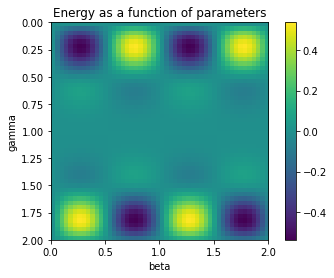

In [12]:
plt.ylabel('gamma')
plt.xlabel('beta')
plt.title('Energy as a function of parameters')
plt.imshow(energies, extent=(0, beta_max, gamma_max, 0))
# Yellow is maximum, indigo is minimum
plt.colorbar()

There are many local minima and maxiuma \\

Can make it challenging to use gradient-based methods for optimization

# Training - Gradient Descent

Try to minimize the energy by gradient decent. 

We know there are local minimua where we might get stucked depending on the initialization, but it's still a good exercise.

***First step:*** Define a function which approximates the gradient of the energy. We will do this by symmetric difference \\

$f'(x) \approx \frac{f(x+\epsilon) - f(x-\epsilon)}{2 \epsilon}$

Good exercise to play with different values of $\epsilon$ as well as different formulas for the gradient.

In [13]:
def gradient_energy(gamma, beta, qaoa, h):
  """use a symmetric difference to calculate the gradient."""
  eps = 10**-3 # Try different values of the dicretization parameter

  # Gamma-component of the gradient
  grad_g = energy_from_params(gamma + eps, beta, qaoa, h)
  grad_g -= energy_from_params(gamma - eps, beta, qaoa, h)
  grad_g /= 2*eps

  # Beta-component of the gradient
  grad_b = energy_from_params(gamma, beta + eps, qaoa, h)
  grad_b -= energy_from_params(gamma, beta - eps, qaoa, h)
  grad_b /= 2*eps 

  return grad_g, grad_b

# Second step:
Implement a gradient descent algorithm to minimize the energy.

Gradient decent is an iteraction to minimize a function f(x) via \\

$x_{j+1} = x_j - \eta \frac{df}{dx} |_{x=x_j}$

In [14]:
# Note we may get stuck in local minima depending on the initilization.

gamma, beta = 0.2, 0.7 # try different initialization
eta = 10**-2 # try to adjust the learning rate.

# The number of gradient deacent steps
nr_iterations = 251
for i in range(nr_iterations):
  # compute the gardients
  grad_g, grad_b = gradient_energy(gamma, beta, qaoa, h)

  # updating gamma and beta using learning rate and gradients
  gamma -= eta*grad_g
  beta -= eta*grad_b

  if not i%25:
    # every 25 steps print to console
    print('Step: {} Energy:{}'.format(i, energy_from_params(gamma, beta, qaoa, h)))

# the final parameters are
print('Learned gamma: {} learned beta: {}'.format(gamma, beta, qaoa, h))

Step: 0 Energy:0.49836250584404396
Step: 25 Energy:-0.5371561056825966
Step: 50 Energy:-0.5376657607509211
Step: 75 Energy:-0.537665855507334
Step: 100 Energy:-0.5376658944482592
Step: 125 Energy:-0.5376658273712059
Step: 150 Energy:-0.5376655867116319
Step: 175 Energy:-0.5376656650898641
Step: 200 Energy:-0.5376657012570326
Step: 225 Energy:-0.5376655064109299
Step: 250 Energy:-0.5376654435903119
Learned gamma: 0.20701606118531882 learned beta: 0.25000255983476305


# Training results

We've optimized our paraeters. How well did we do?

For a 3x3 gridwe have 9 qubits and 12 interacting nearest-neighbor pairs. If all the qubits are in |0> or all are in |1> state, then the energy-per-qubit is -12/9 = 1.33 at zero external magnetic field $h$, and will be close to that if the magnetic field is small.

Notice that the QAOA algorithm we analyzed above is not close to that ground state. Is this a problem?

Not really. The QAOA algorithm prpare a certain state which is a linear combination of the ground state and other states. When we measure the qubits, we find the ground-state configuration with some probability. If that probability is large, then after a reasonable small number of measurements, we'll locate the groud state.

***Pratically speaking, this means we should measured the state prpared by the QAOA several times and record the lowest-energy state we find. The QAOA can be successful by biasing these measurements toward the ground state, even if they do not produce the ground state with 100% probability.***

Let's see how this works:

First: Make a copy of our qaoa circuit for measurement purposes and attach a measurement gate to each qubit:

In [15]:
measurement_circuit = qaoa.copy()
measurement_circuit.append(cirq.measure(*[qubit for row in qubits for qubit in row], key='m'))
measurement_circuit

┌────────┐
(0, 0): ───H───ZZ─────ZZ─────────────────────────────────────────────────────X^b───M('m')───
               │      │                                                            │
(0, 1): ───H───┼──────ZZ^g───ZZ─────ZZ───────────────────────────────────────X^b───M────────
               │             │      │                                              │
(0, 2): ───H───┼─────────────┼──────ZZ^g────ZZ───────────────────────────────X^b───M────────
               │             │              │                                      │
(1, 0): ───H───ZZ^g───ZZ─────┼──────ZZ──────┼────────────────────────────────X^b───M────────
                      │      │      │       │                                      │
(1, 1): ───H──────────┼──────ZZ^g───ZZ^g────┼───ZZ──────ZZ───────────────────X^b───M────────
                      │                     │   │       │                          │
(1, 2): ───H──────────┼─────────────────────ZZ^g┼───────ZZ^g───ZZ────────────X^b───M────────
                      │                         │              │                   │
(2, 0): ───H──────────ZZ^g──────────────────────┼───────ZZ─────┼─────────────X^b───M────────
                                                │       │      │                   │
(2, 1): ───H────────────────────────────────────ZZ^g────ZZ^g───┼──────ZZ─────X^b───M────────
                                                               │      │            │
(2, 2): ───H───────────────────────────────────────────────────ZZ^g───ZZ^g───X^b───M────────
                                           └────────┘

# Second:
Instantiate a simulator and measure the output of the circuit repeatedly:

In [44]:
num_reps = 10**4 # try different repetition times
gamma, beta = 0.2, 0.25 # try different values of the parameters

simulator = cirq.Simulator()

params = cirq.ParamResolver({'g':gamma, 'b':beta})

result = simulator.run(measurement_circuit, param_resolver=params, repetitions=num_reps)

# Finally:
Compute the energy for each of measurement outcomes and look and the statistics.

Start with a helper function which calculates the energy given a set of measurement outcomes:

In [45]:
def comput_energy(meas, h):
  Z_vals = 1 - 2*meas.reshape(n_rows, n_cols)
  energy = 0
  for i in range(n_rows):
    for j in range(n_cols):
      if i < n_rows - 1:
        energy -= Z_vals[i, j]*Z_vals[i+1, j]
      if j < n_cols - 1:
        energy -= Z_vals[i, j]*Z_vals[i, j+1]
      energy -= h[i, j]*Z_vals[i, j]

  return energy/(n_cols*n_rows)

Then consider the most common outcomes of the measurements and compute the energy of those:


In [46]:
hist = result.histogram(key='m')
num = 10
probs = [v/result.repetitions for _,v in hist.most_common(num)]
configs = [c for c,_ in hist.most_common(num)]

Fraction of outputs displayed: 0.23


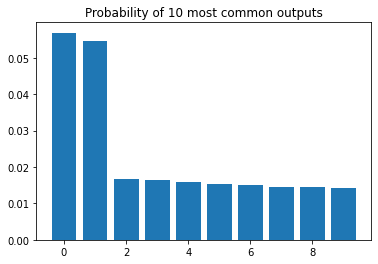

In [47]:
print('Fraction of outputs displayed: {}'.format(np.sum(probs).round(2)))

plt.title('Probability of {} most common outputs'.format(num))
plt.bar([x for x in range(len(probs))], probs)
plt.show()

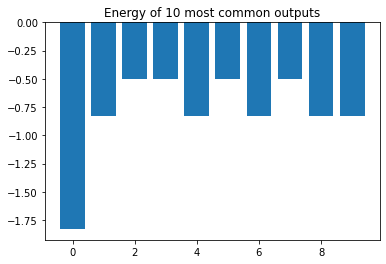

In [50]:
# a strange way to generate back binary expansion
meas = [[int(s) for s in ''.join([str(b) for b in bin(k)[2:]]).zfill(n_rows*n_cols)] for k in configs]

costs = [comput_energy(np.array(m), h) for m in meas]
plt.title('Energy of {} most common outputs'.format(num))
plt.bar([x for x in range(len(costs))], costs)
plt.show()

For a good choice of $\gamma$ and $\beta$, the ground state is the most probable outcome.

Try changing the values of $\gamma$ and $\beta$ away from the optimal ones. You will see that this experiment no longer finds the groudn state for us.

Fraction of outputs displayed: 0.03


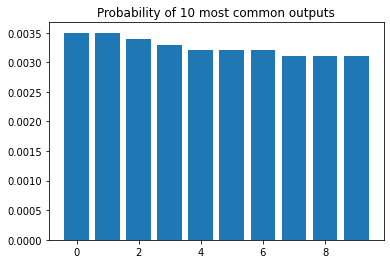

In [51]:
num_reps = 10**4 # try different repetition times
gamma, beta = 1.0, 1.0 # try different values of the parameters

simulator = cirq.Simulator()

params = cirq.ParamResolver({'g':gamma, 'b':beta})

result = simulator.run(measurement_circuit, param_resolver=params, repetitions=num_reps)

hist = result.histogram(key='m')
num = 10
probs = [v/result.repetitions for _,v in hist.most_common(num)]
configs = [c for c,_ in hist.most_common(num)]


print('Fraction of outputs displayed: {}'.format(np.sum(probs).round(2)))

plt.title('Probability of {} most common outputs'.format(num))
plt.bar([x for x in range(len(probs))], probs)
plt.show()


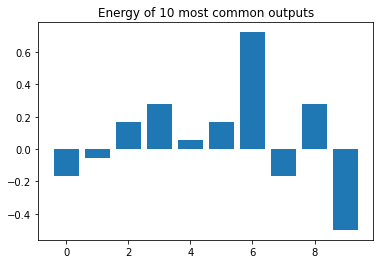

In [52]:
# a strange way to generate back binary expansion
meas = [[int(s) for s in ''.join([str(b) for b in bin(k)[2:]]).zfill(n_rows*n_cols)] for k in configs]

costs = [comput_energy(np.array(m), h) for m in meas]
plt.title('Energy of {} most common outputs'.format(num))
plt.bar([x for x in range(len(costs))], costs)
plt.show()